# Assignment 1: Introduction to Data Science and Python


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

## Contributors:
### Lukas Andersson - X Hours
###

## 1.

### a.
In this first assignment we manipulate given data to later print it out as a scatter plot. By looking at the data you quickly realize that the life expectancy data have way more entires than the given GDP data. This has two reasons, firstly because every country has data from several years, not just 2015, in the life expectancy table. And secondly because they do not have the same set of countries to begin with. To solve this we first remove every single entry that does not have data from the year of 2015, since thats the only data we have on GDP. Then we loop through all those entries and make sure to only keep the ones where the country exists in both data sets. When we filterd out all data we do not want, we simply plot out the results. The first graph includes all data and the second one excludes the entry far right.  

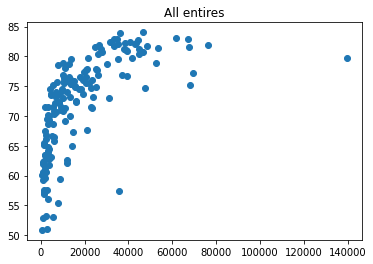

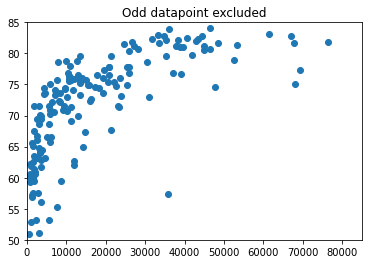

In [7]:
x = []
y = []

df1 = pd.read_csv('../data/GDP-2015.csv')
df2 = pd.read_csv('../data/life-expectancy.csv')

for index2, row2 in df2.iterrows():
    if row2['Year'] == 2015:
        for index1, row1 in df1.iterrows():
            if row2['Entity'] == row1['Entity']:
                x.append(row1['GDP per capita'])
                y.append(row2['Life expectancy (years)'])
                
data = np.column_stack((x, y))

plt.scatter(x, y)
plt.title('All entires')
plt.show()

plt.scatter(x, y)
plt.title('Odd datapoint excluded')
plt.xlim([0, 85000])
plt.ylim([50, 85])
plt.show()

### b.
When looking at the result we clearly see that when the GDP per capita goes up, (X axis), the life expectancy generally also goes up. There are some countries with high life expectancy even tho the GDP is low, but not the other way around. There is in our data set only one country that has a low life expectancy while the GDP is relatively high. This one data point is the only thing contradicting the correlation between GDP and life expectancy so we would draw the conclusion that high GDP in fact does contribute to higher life expectancy. The second graph that excludes the entry far to the right simply is a zoomed in version to make the correaltion more visible.

This result seems very reasonable since higher life expectancy is what you would think will happen if you have a higher GDP per capita, very resonable.

### c.
No, nothing was removed from the data however we made two plots, where one datapoint is not included in the second one. The reason for this is becuase that datapoint is so extreme compared to the other data, so it is more visually pleasing not not include it and easier see the correlation. 

### d.

In [32]:
countries_LE_above_OneSD = set()
one_sd_above_mean = (data.mean(axis=0)  + data.std(axis=0))[1]
for index, row in df2.iterrows():
    if row['Year'] == 2015:
        if(row['Life expectancy (years)'] >  one_sd_above_mean):
            countries_LE_above_OneSD.add(row['Entity'])
print(countries_LE_above_OneSD)

{'Italy', 'Falkland Islands', 'Germany', 'Switzerland', 'Israel', 'Macao', 'Austria', 'Saint Barthlemy', 'Channel Islands', 'Finland', 'Norway', 'Spain', 'Singapore', 'United Kingdom', 'Belgium', 'Greece', 'Ireland', 'Bermuda', 'Saint Helena', 'Luxembourg', 'Saint Pierre and Miquelon', 'Japan', 'Faeroe Islands', 'Canada', 'Australia', 'Tokelau', 'Denmark', 'Monaco', 'New Zealand', 'Martinique', 'Anguilla', 'Andorra', 'Slovenia', 'Sweden', 'Cyprus', 'Portugal', 'Hong Kong', 'France', 'Iceland', 'Isle of Man', 'Saint Martin (French part)', 'Liechtenstein', 'Malta', 'Netherlands', 'South Korea', 'Guadeloupe', 'Cayman Islands', 'San Marino'}


### e.
Every country in the top left of the graph 
TODO: Not sure if we should include actual examples or not
COMMENT : We might have to display the countries that have GDP below mean and life expectency above mean. OR do we take 1 or 2 SDs above mean?

In [33]:
countries_lowGDP_highLE = set()
mean_for_data = data.mean(axis=0)
for index2, row2 in df2.iterrows():
    if row2['Year'] == 2015:
        for index1, row1 in df1.iterrows():
            if row1['GDP per capita'] < data.mean(axis=0)[0] and row2['Life expectancy (years)'] > data.mean(axis=0)[1] :
                countries_lowGDP_highLE.add(row1['Entity'])

print(countries_lowGDP_highLE)

{'Azerbaijan', 'Dominica', 'Congo', 'Yemen', 'Uzbekistan', 'Cape Verde', 'Cambodia', 'North Korea', 'Uganda', 'Niger', 'Cuba', 'Jamaica', 'Democratic Republic of Congo', 'Namibia', 'Saint Lucia', 'Burkina Faso', 'Algeria', 'Brazil', 'Rwanda', 'Chad', 'Guinea-Bissau', 'Ukraine', 'Bulgaria', 'Nepal', 'Tunisia', 'Albania', 'Peru', 'China', 'Mozambique', 'Swaziland', 'Tajikistan', 'Colombia', 'Costa Rica', 'Palestine', 'Montenegro', 'Kyrgyzstan', 'Lebanon', 'Libya', 'Zambia', 'Haiti', 'Sao Tome and Principe', 'Armenia', 'Vietnam', 'Nicaragua', 'Mali', 'El Salvador', 'Cameroon', 'Sudan', 'Dominican Republic', 'Guatemala', 'Laos', 'Morocco', 'Zimbabwe', 'Mauritania', 'Philippines', 'Barbados', 'Benin', 'Ghana', 'Georgia', 'Mongolia', 'Madagascar', 'Kenya', 'Togo', 'Bosnia and Herzegovina', 'Liberia', 'Angola', 'Egypt', 'Bangladesh', 'Jordan', 'Myanmar', 'Iraq', 'Burundi', 'Sierra Leone', 'Comoros', 'Ethiopia', 'Mexico', 'Afghanistan', 'Venezuela', 'Paraguay', 'Moldova', 'Guinea', 'Botswana',

### f.
TODO: Not sure what the question is after, if it just wants o know if any of our data has high GDP per capita but low life expectancy there is one country, Equatorial guinea which stands out a lot on the graph
COMMENT: same as previous question mean plus SD or just mean? The above mentioned country is very well evident and can be mentioned

In [34]:
countries_highGDP_lowLE = set()
mean_for_data = data.mean(axis=0)
for index2, row2 in df2.iterrows():
    if row2['Year'] == 2015:
        for index1, row1 in df1.iterrows():
            if row1['GDP per capita'] > data.mean(axis=0)[0] and row2['Life expectancy (years)'] < data.mean(axis=0)[1] :
                countries_lowGDP_highLE.add(row1['Entity'])

print(countries_lowGDP_highLE)

{'Azerbaijan', 'Dominica', 'Congo', 'Yemen', 'Russia', 'Uzbekistan', 'Cape Verde', 'Cambodia', 'North Korea', 'Spain', 'Uganda', 'Niger', 'Belarus', 'Argentina', 'Malaysia', 'Mauritius', 'Cuba', 'Jamaica', 'Democratic Republic of Congo', 'Namibia', 'Saint Lucia', 'Canada', 'Burkina Faso', 'Algeria', 'Brazil', 'Rwanda', 'Denmark', 'Chad', 'New Zealand', 'Lithuania', 'Guinea-Bissau', 'Hungary', 'Cyprus', 'Portugal', 'Ukraine', 'Italy', 'Croatia', 'Panama', 'Bulgaria', 'Nepal', 'Tunisia', 'Albania', 'Israel', 'Trinidad and Tobago', 'Peru', 'China', 'Mozambique', 'Austria', 'Finland', 'Puerto Rico', 'Swaziland', 'Tajikistan', 'Colombia', 'Romania', 'Costa Rica', 'Czechoslovakia', 'Taiwan', 'Palestine', 'Saudi Arabia', 'Montenegro', 'Kyrgyzstan', 'Lebanon', 'Bahrain', 'Libya', 'Poland', 'Estonia', 'Zambia', 'Slovenia', 'Sweden', 'Haiti', 'Seychelles', 'Sao Tome and Principe', 'Kazakhstan', 'Armenia', 'Vietnam', 'Nicaragua', 'Mali', 'El Salvador', 'United Arab Emirates', 'Cameroon', 'Sudan',

### g.
TODO

## 2.

### a.


### b.
